<a href="https://colab.research.google.com/github/victordsrocha/Aprendizagem-de-Maquina-2021.1/blob/main/ML_Trabalho_Final_Regress%C3%A3o_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [8]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Get the data

In [6]:
dataset_path = 'https://github.com/victordsrocha/Aprendizagem-de-Maquina-2021.1/raw/main/dataset-1bola.csv'

# mantive todas as colunas para caso sejam úteis no futuro
column_names = ['bola_branca_x','bola_branca_y','bola_1_x','bola_1_y','tacada_x',
                'tacada_y','forca','out_bola_branca_x','out_bola_branca_y','out_bola_1_x',
                'out_bola_1_y','dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y']

raw_dataset = pd.read_csv(dataset_path, names=column_names, sep=',')

# drop das colunas que não vamos utilizar
raw_dataset=raw_dataset.drop(columns=['forca','out_bola_branca_x','out_bola_branca_y','out_bola_1_x',
                'out_bola_1_y','dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y'])

dataset = raw_dataset.copy()
dataset.tail()

,bola_branca_x,bola_branca_y,bola_1_x,bola_1_y,tacada_x,tacada_y
83911,0.211559,0.273849,0.069541,0.068641,-0.559838,-0.828602
83912,0.779373,0.386655,0.772425,0.212990,-0.070697,-0.997498
83913,0.797904,0.376335,0.753802,0.029519,-0.150995,-0.988534
83914,0.799908,0.253087,0.602778,0.141271,-0.857461,-0.514549
83915,0.446634,0.062459,0.940956,0.638424,0.656110,0.754666


Split the data into train and test

In [46]:
X = dataset.drop(columns=['tacada_x','tacada_y'])
y = pd.DataFrame({"arc_tangent":np.arctan(dataset['tacada_x'] / dataset['tacada_y']).T})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inspect the data

In [47]:
# apresenta a descrição dos dados de treino - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,67132.0,0.512318,0.255489,0.010084,0.305967,0.500139,0.726007,0.990000
bola_branca_y,67132.0,0.374178,0.194228,0.010083,0.216302,0.375000,0.531559,0.740000
bola_1_x,67132.0,0.517022,0.327201,0.009782,0.191748,0.540294,0.820357,0.991592
bola_1_y,67132.0,0.374911,0.231907,0.008124,0.153846,0.375000,0.596124,0.742211


In [48]:
# apresenta a descrição dos dados de treino - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arc_tangent,67132.0,-0.001666,0.885256,-1.57078,-0.813542,-0.007471,0.807088,1.570762


Normalize the data

In [50]:
# não testei se a normalização realmente ajuda

# normalização z-score de todos os dados

import numpy as np

def normalize_zscore(data):
    data_scaled = data
    data_mean = data_scaled.mean(axis=0)
    data_std = data_scaled.std(axis=0)
    data_scaled = (data_scaled - data_mean) / data_std
    return data_scaled
  
X_train, X_test, y_train, y_test

normed_X_train = normalize_zscore(X_train)
normed_X_test = normalize_zscore(X_test)
normed_y_train = normalize_zscore(y_train)
normed_y_test = normalize_zscore(y_test)

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,67132.0,-1.209329e-14,1.0,-1.965778,-0.807672,-0.047671,0.836390,1.869676
bola_branca_y,67132.0,-3.053643e-15,1.0,-1.874577,-0.812838,0.004232,0.810290,1.883469
bola_1_x,67132.0,4.591491e-14,1.0,-1.550239,-0.994109,0.071124,0.927061,1.450392
bola_1_y,67132.0,6.010780e-15,1.0,-1.581614,-0.953247,0.000386,0.953889,1.583830


In [51]:
# apresenta a descrição dos dados de treino normalizados - entrada
normed_X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,67132.0,-1.209329e-14,1.0,-1.965778,-0.807672,-0.047671,0.836390,1.869676
bola_branca_y,67132.0,-3.053643e-15,1.0,-1.874577,-0.812838,0.004232,0.810290,1.883469
bola_1_x,67132.0,4.591491e-14,1.0,-1.550239,-0.994109,0.071124,0.927061,1.450392
bola_1_y,67132.0,6.010780e-15,1.0,-1.581614,-0.953247,0.000386,0.953889,1.583830


In [52]:
# apresenta a descrição dos dados de treino normalizados - saída
normed_y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arc_tangent,67132.0,3.936023e-18,1.0,-1.772497,-0.917109,-0.006557,0.913581,1.77624


Build the model

In [70]:
# dimensões de entrada e saída
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

# modelo
model = keras.models.Sequential()
model.add(layers.Dense(100, input_dim=in_dim, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(out_dim))
model.compile(loss="mse", optimizer="SGD", metrics=['mae','mse'])

# log tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logggs")

# sumário do modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 3,765
Trainable params: 3,765
Non-trainable params: 0
_________________________________________________________________


Train the model

In [86]:
history = model.fit(normed_X_train, normed_y_train, epochs=100, validation_data=(normed_X_test, normed_y_test), batch_size=12, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/100
5595/5595 [==============================] - 9s 2ms/step - loss: 0.0577 - mae: 0.0972 - mse: 0.0577 - val_loss: 0.0530 - val_mae: 0.0899 - val_mse: 0.0530
Epoch 2/100
5595/5595 [==============================] - 9s 2ms/step - loss: 0.0575 - mae: 0.0969 - mse: 0.0575 - val_loss: 0.0599 - val_mae: 0.1073 - val_mse: 0.0599
Epoch 3/100
5595/5595 [==============================] - 9s 2ms/step - loss: 0.0577 - mae: 0.0970 - mse: 0.0577 - val_loss: 0.1127 - val_mae: 0.1900 - val_mse: 0.1127
Epoch 4/100
5595/5595 [==============================] - 9s 2ms/step - loss: 0.0573 - mae: 0.0956 - mse: 0.0573 - val_loss: 0.0664 - val_mae: 0.1301 - val_mse: 0.0664
Epoch 5/100
5595/5595 [==============================] - 10s 2ms/step - loss: 0.0562 - mae: 0.0950 - mse: 0.0562 - val_loss: 0.0557 - val_mae: 0.0835 - val_mse: 0.0557
Epoch 6/100
5595/5595 [==============================] - 9s 2ms/step - loss: 0.0538 - mae: 0.0925 - mse: 0.0538 - val_loss: 0.0560 - val_mae: 0.0898 - val_mse: 0.05

In [74]:
# Comandos para fazer download da pasta de logs para o tensorboard

"""
!zip -r /content/file.zip /content/logggs
from google.colab import files
files.download("/content/file.zip")
"""

updating: content/logggs/ (stored 0%)
updating: content/logggs/train/ (stored 0%)
updating: content/logggs/train/events.out.tfevents.1629697168.1d471eafdd5a.66.1.v2 (deflated 91%)
updating: content/logggs/train/events.out.tfevents.1629697169.1d471eafdd5a.profile-empty (deflated 5%)
updating: content/logggs/train/plugins/ (stored 0%)
updating: content/logggs/train/plugins/profile/ (stored 0%)
updating: content/logggs/train/plugins/profile/2021_08_23_05_39_29/ (stored 0%)
updating: content/logggs/train/plugins/profile/2021_08_23_05_39_29/1d471eafdd5a.input_pipeline.pb (deflated 56%)
updating: content/logggs/train/plugins/profile/2021_08_23_05_39_29/1d471eafdd5a.kernel_stats.pb (stored 0%)
updating: content/logggs/train/plugins/profile/2021_08_23_05_39_29/1d471eafdd5a.tensorflow_stats.pb (deflated 71%)
updating: content/logggs/train/plugins/profile/2021_08_23_05_39_29/1d471eafdd5a.overview_page.pb (deflated 61%)
updating: content/logggs/train/plugins/profile/2021_08_23_05_39_29/1d471eafdd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Plot

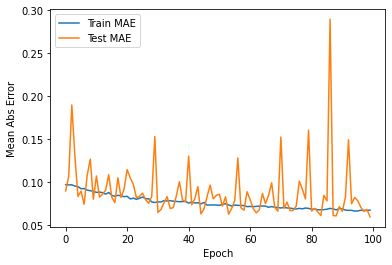

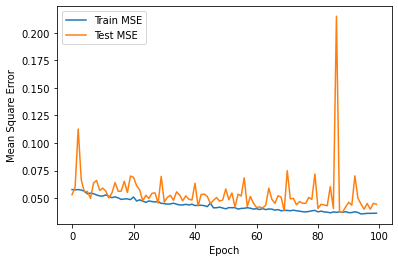

In [87]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'], label='Train MAE')
  plt.plot(hist['epoch'], hist['val_mae'], label='Test MAE')
  plt.legend()
  #plt.ylim([0,5])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'], label='Test MSE')
  plt.legend()
  #plt.ylim([0,20])

plot_history(history)

